In [1]:
import os
os.environ['HSA_OVERRIDE_GFX_VERSION'] = '10.3.0'

In [2]:
from pathlib import Path
import os
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:
livePath = Path("/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2")

dmosPath = livePath / "dmos.mat"
refnamesPath = livePath / "refnames_all.mat"
dmos_relPath = livePath / "dmos_realigned.mat"

The subjective experiment release comes with the following files:

* This readme file containing copyright information and usage information.
* Information files describing parameters used for generating the images
* Two subjective score files containing raw subject scores in text format
* alot of images in bmp format. Images of the filename img%%.bmp are the ones 
  used in the subjective testing. 



DETAILS OF THE DATABASE
~~~~~~~~~~~~~~~~~~~~~~~

29 input images were used to create a database whose results are being provided. 
These were distorted using the following distortion types: JPEG2000, JPEG, White noise
in the RGB components, Gaussian blur in the RGB components, and bit errors in JPEG2000
bitstream when transmitted over a simulated fast-fading Rayleigh channel. The details are
as follows:

JPEG2000:
The JPEG2000 codec used was Kakadu version 2.2 that comes with the book: 
"JPEG2000 Image compression fundamentls, standards and practice" by David 
Taubman and Michael Marcellin, 2002 Kluwer Academic Publishers.

The command for generation of the database was: 
kdu_compress -i  source_filename -o destination_filename -rate bitrate -no_weights
The source, destination and the bitrates are given in the info.txt file in the jp2k folder.


JPEG:
MATLAB's imwrite command was used to write JPEG files.

The command for generation of the database was: "imwrite(image, jpegfilename, 'Quality', q);"
The source, destination and the bitrates are given in the info.txt file in the JPEG folder. Note that 
the info file contains the "achieved" bit rate. The "Quality" parameter is not available.

White Noise:
White Gaussian noise of standard deviation sigma was added to RGB components of the images. 
The same sigma was used for R, G, and B components. The values of sigma uses are given in the 
info.txt file in the wn folder

Gaussian Blur:
R, G, and B components were filtered using a circular-symmetric 2-D Gaussian kernel of standard deviation sigma.
The value of sigma is given in the info.txt file in the gblur folder.

Fast Fading Rayleigh:
Receiver SNR (simulated) was used to generate images with different proportions of bit errors. 
The JPEG2000 bitstream was generated using the same codec as above using the following command:
kdu_compress -i image.bmp -o image.jp2 Sprecision=8 Ssigned={no} Cuse_sop={no} Cuse_eph={no} Corder={LRCP} -rate 2.5 "Cmodes=ERTERM|RESTART|RESET|CAUSAL|SEGMARK" Cuse_precincts={yes} Cprecincts={64,64}
Note that the source rate is 2.5 bits per pixel, and error resilience features in JPEG2000 were enabled.
The receiver SNR used to vary the distortion strenghts is given in the info.txt file in the fastfading folder.

DETAILS OF THE EXPERIMENTS AND PROCESSING OF RAW SCORES
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Details of the subjective testing can be found in:
H. R. Sheikh, "Image Quality Assessment Using Natural Scene Statistics," Ph.D. dissertation,
University of Texas at Austin, May 2004.

Briefly they are as follows:

Twenty-nine high-resolution 24-bits/pixel RGB color images
(typically 768 X 512) were distorted using five distortion
types: JPEG2000, JPEG, white noise in the RGB components, Gaussian
blur, and transmission errors in the JPEG2000 bit stream using a
fast-fading Rayleigh channel model. A database was derived from
the $29$ images such that each image had test versions with each
distortion type, and for each distortion type the perceptual
quality roughly covered the entire quality range. Observers were
asked to provide their perception of quality on a continuous
linear scale that was divided into five equal regions marked with
adjectives ``Bad", ``Poor", ``Fair", ``Good" and ``Excellent".
About 20-29 human observers rated each image. Each distortion type
was evaluated by different subjects in different experiments using
the same equipment and viewing conditions. In this way a total of
982 images, out of which 203 were the reference images, were
evaluated by human subjects in seven experiments. The raw scores
for each subject were converted to difference scores (between
the test and the reference) and then Z-scores and
then scaled and shifted to the full range (1 to 100). Finally, a 
Difference Mean Opinion Score (DMOS) value for each distorted image
was computed.


DETAILS OF FILES PROVIDED IN THIS RELEASE
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

INFORMATION FILES
The information fileS contains a list which describes how the database was created. 
Each line is separate entry in the image database: 
<Source image> <Destination image> <parameter>
where parameter depends on the distortion type as described above.

MATLAB mat files
The file dmos.mat has two arrays of length 982 each: dmos and orgs. orgs(i)==0 for distorted images.
The arrays dmos and orgs are arranged by concatenating the dmos (and orgs) variables
for each database as follows:

dmos=[dmos_jpeg2000(1:227) dmos_jpeg(1:233) white_noise(1:174) gaussian_blur(1:174) fast_fading(1:174)] where
dmos_distortion(i) is the dmos value for image "distortion\imgi.bmp" where distortion can be one of the five
described above.

The values of dmos when corresponding orgs==1 are zero (they are reference images). Note that imperceptible
loss of quality does not necessarily mean a dmos value of zero due to the nature of the score processing used.

The file refnames_all.mat contains a cell array refnames_all. Entry refnames_all{i} is the name of
the reference image for image i whose dmos value is given by dmos(i). If orgs(i)==0, then this is a valid
dmos entry. Else if orgs(i)==1 then image i denotes a copy of the reference image. The reference images are
provided in the folder refimgs.

In [30]:
dmoss =  sio.loadmat(dmosPath)
print(dmoss.keys())
print("orgs",dmoss["orgs"][0][0:10])
print("dmos",dmoss["dmos"][0][0:10])
print("len", len(dmoss["dmos"][0]))
print("---------")
refnames = sio.loadmat(refnamesPath)
print(refnames.keys())
print("refnames",refnames["refnames_all"])
print("len",len(refnames["refnames_all"][0]))
print("-----------")
dmosrel = sio.loadmat(dmos_relPath)
print(dmosrel.keys())
print("orgs",dmosrel["orgs"][0][0:10])
print("dmos",dmosrel["dmos_new"][0][0:10])
print("dmos_std",dmosrel["dmos_std"][0][0:10])


dict_keys(['__header__', '__version__', '__globals__', 'orgs', 'dmos'])
orgs [1 0 0 0 0 0 0 0 1 0]
dmos [ 0.         28.00384536 34.01073628 65.13140971 68.9113403  65.15010253
 54.39726604 44.3971449   0.         47.43001376]
len 982
---------
dict_keys(['__header__', '__version__', '__globals__', 'refnames_all'])
refnames [[array(['buildings.bmp'], dtype='<U13')
  array(['studentsculpture.bmp'], dtype='<U20')
  array(['rapids.bmp'], dtype='<U10')
  array(['dancers.bmp'], dtype='<U11')
  array(['churchandcapitol.bmp'], dtype='<U20')
  array(['dancers.bmp'], dtype='<U11')
  array(['churchandcapitol.bmp'], dtype='<U20')
  array(['stream.bmp'], dtype='<U10')
  array(['cemetry.bmp'], dtype='<U11') array(['woman.bmp'], dtype='<U9')
  array(['lighthouse2.bmp'], dtype='<U15')
  array(['sailing3.bmp'], dtype='<U12')
  array(['buildings.bmp'], dtype='<U13')
  array(['paintedhouse.bmp'], dtype='<U16')
  array(['bikes.bmp'], dtype='<U9') array(['ocean.bmp'], dtype='<U9')
  array(['stream.bmp'], 

In [40]:
import re

jpegPaths = list((livePath / "jpeg").glob("*.bmp"))

def sortFunc(path):
    filename = os.path.basename(path)
    m = re.match(r"img(\d+)\.bmp", filename)
    if m:
        return int(m.group(1))
    else:
        return float('inf')

jpegPaths = sorted(jpegPaths,key=sortFunc)

joined = jpegPaths[0:5] + jpegPaths[10:15]
# joined.append(jpegPaths[0:5])
# joined.append(jpegPaths[10:15])
# fl = np.array(joined).flatten()
# fl[2]
joined

[PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img1.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img2.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img3.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img4.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img5.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img11.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img12.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img13.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img14.bmp'),
 PosixPath('/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/jpeg/img15.bmp')]

In [53]:
from torch.utils.data import Dataset
import torch;
from typing import Tuple
from PIL import Image
import matplotlib.pyplot as plt

class LIVEDataset(Dataset):
  def __init__(self, path:Path, train:bool, transform:torch.nn.Module = None, testSize = 0.2) -> None:
    super().__init__()
    self.train = train
    self.path = path
    self.dmosPath = path / "dmos.mat"

    jp2kPaths = self.sortPaths(list((path / "jp2k").glob("*.bmp")))
    jpegPaths = self.sortPaths(list((path / "jpeg").glob("*.bmp")))
    wnPaths = self.sortPaths(list((path / "wn").glob("*.bmp")))
    gblurPaths = self.sortPaths(list((path / "gblur").glob("*.bmp")))
    fastfadingPaths = self.sortPaths(list((path / "fastfading").glob("*.bmp")))

    self.imgsPaths = jp2kPaths + jpegPaths + wnPaths + gblurPaths + fastfadingPaths

    self.dmos =  sio.loadmat(self.dmosPath)
    length = len(self.dmos["dmos"][0])
    
    assert len(self.imgsPaths) == length, "lenths should be the same"

    self.indexes = np.arange(start=0, stop=length) 

    i_train, i_test = train_test_split(self.indexes, test_size=testSize, random_state=21, shuffle=True)

    self.indexes = i_train if train else i_test
    
    self.transform = transform

  def __len__(self):
    return len(self.indexes)  

  def __getitem__(self, index) -> Tuple[torch.Tensor, torch.Tensor]:
    i = self.indexes[index]
    img_path = self.imgsPaths[i] 
    dmos = self.dmos["dmos"][0][i]

    print(img_path)
    img = Image.open(img_path)

    if(self.transform != None):
      img = self.transform(img)


    dmos = torch.tensor(dmos)

    return (img, dmos)
  
  def sortFunc(self,path):
    filename = os.path.basename(path)
    m = re.match(r"img(\d+)\.bmp", filename)
    if m:
        return int(m.group(1))
    else:
        return float('inf')
    
  def sortPaths(self,paths): 
    return  sorted(paths,key=self.sortFunc)
     

In [54]:
trainData = LIVEDataset(livePath, True)

/home/mrpaw/Documents/mag_databases/LIVE/databaserelease2/gblur/img53.bmp
<class 'torch.Tensor'>
tensor(55.7138, dtype=torch.float64)


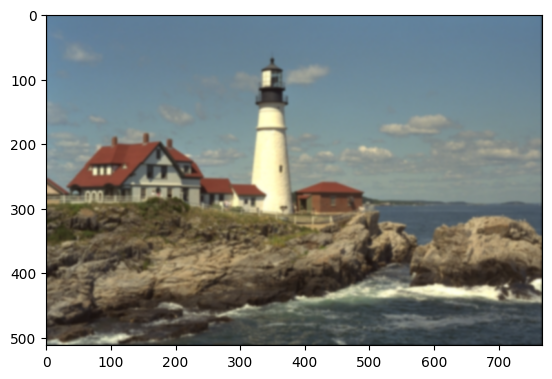

In [55]:
img, mos = trainData[40]
print(type(mos))
print(mos)
plt.imshow(img)